In [1]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image

from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 14

In [2]:
ImagePATH = f"images/"

In [3]:
ImagePATH

'images/'

glob lets you get names of files or folders in a directory using a regex.

In [4]:
categories = glob(ImagePATH+"*")

In [5]:
print(categories)

['images/buoy', 'images/inflatable boat', 'images/gondola', 'images/boats', 'images/paper boat', 'images/kayak', 'images/sailboat', 'images/ferry boat', 'images/freight boat', 'images/cruise ship']


In [6]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({'filepath':files,'category':cat.split("/")[-1]})
    filedf = pd.concat([filedf,tempdf])

In [7]:
filedf.head()

,filepath,category
0,images/buoy/blue-boat-buoy-floating-2834157.jpg,buoy
1,images/buoy/city-stump-sitting-harbor-buoys-69...,buoy
2,images/buoy/buoy-beacon-sea-beach-sand-2266571...,buoy
3,images/buoy/buoy-sky-coastal-blue-travel-35683...,buoy
4,images/buoy/water-buoys-shipping-river-113476.jpg,buoy


In [8]:
gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)

In [9]:
gby_cnt

,category,cnt
9,sailboat,488
7,kayak,254
5,gondola,242
2,cruise ship,239
3,ferry boat,81
1,buoy,68
8,paper boat,40
4,freight boat,29
6,inflatable boat,21
0,boats,9


In [13]:
fig=px.bar(gby_cnt,x = 'category',y = 'cnt',color = 'category',title = 'Counts from Each Category', text = 'cnt')
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()
plt.savefig('counts_category.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
!mkdir outputs

In [ ]:
gby_cnt.to_csv(f"outputs/category_counts.csv",index=None)

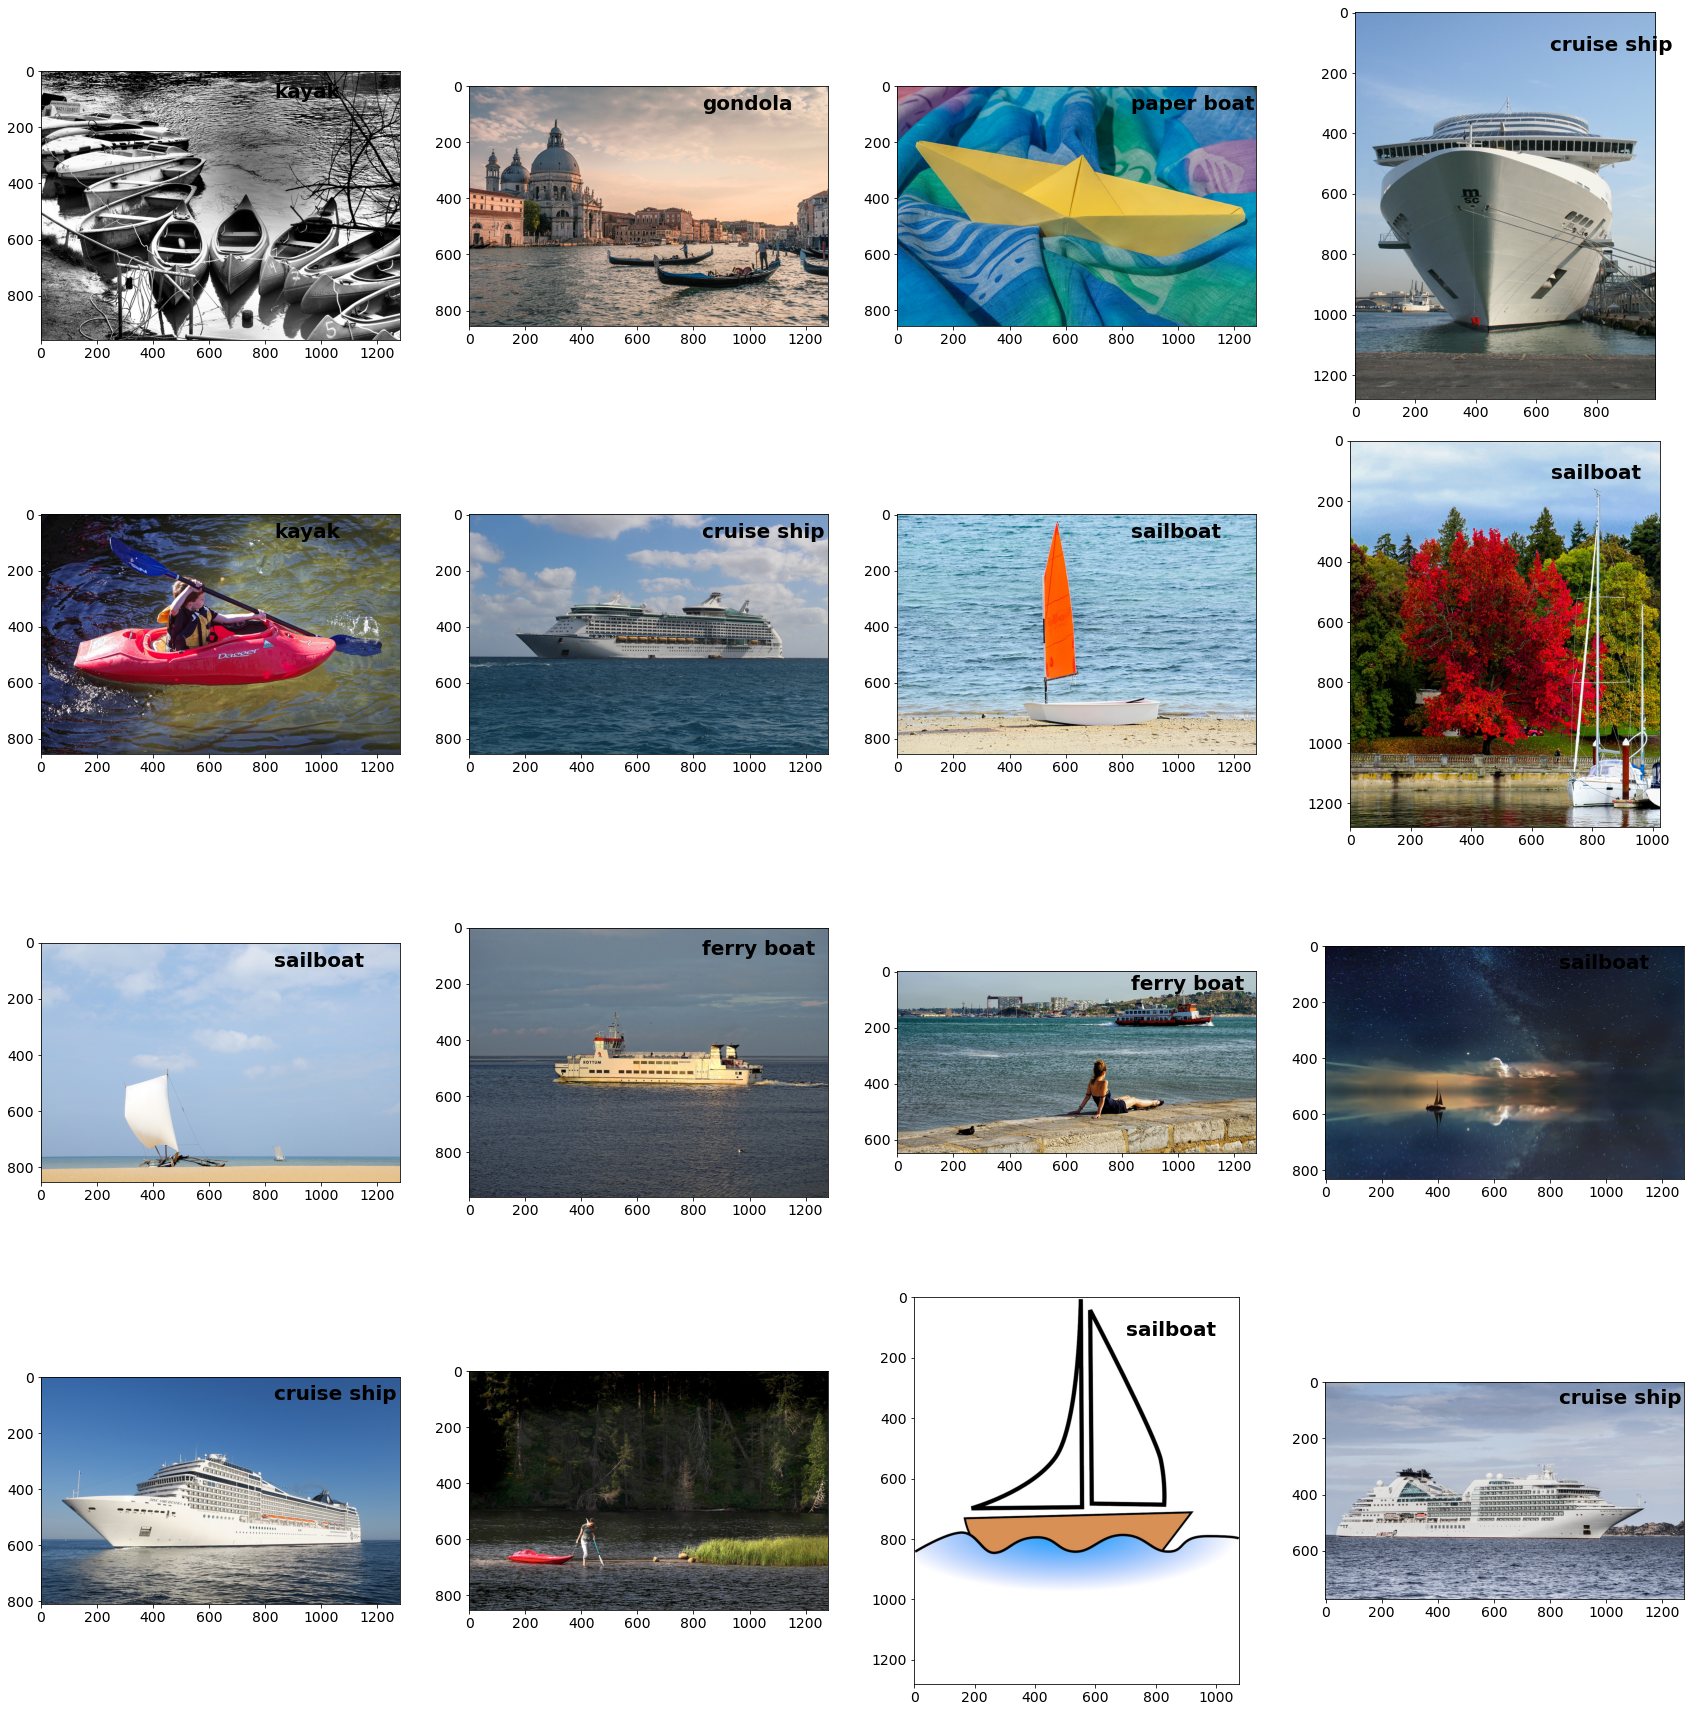

In [16]:
plt.figure(figsize=(24, 24))

for i in range(16):
    path = filedf.sample(1)['filepath'].values[0]
    category = path.split("/")[1]
    ex_img = Image.open(path)
    ax = plt.subplot(4, 4, i + 1)
    ax.annotate(category, xy=(0.65, 0.9), xycoords="axes fraction",weight='bold',size=20)
    ax.imshow(ex_img)

plt.tight_layout()

filter classes with low counts

In [ ]:
focus_cats = gby_cnt[gby_cnt['cnt'] >=40]['category'].values

In [ ]:
focus_cats

In [ ]:
filedf  = filedf[filedf['category'].isin(focus_cats)]

In [ ]:
filedf

In [ ]:
filedf.category.value_counts()

In [ ]:
X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.4)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)

In [ ]:
X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'

In [ ]:
fulldf = pd.concat([X_train,X_test,X_val])

In [ ]:
fulldf.type.value_counts()

In [ ]:
fulldf.head()

In [ ]:
# baseline accuracy

fulldf.category.value_counts()[0]/len(fulldf)

In [ ]:
fulldf.category.unique()

In [ ]:
#os.getcwd()

In [ ]:
!mkdir data
!rm -rf data/
!rm -rf data/train
!rm -rf data/test
!rm -rf data/val
!mkdir data/
!mkdir data/train
!mkdir data/test
!mkdir data/val

In [ ]:
for cat in fulldf.category.unique():
    os.system(f"mkdir data/train/'{cat}'") 
    os.system(f"mkdir data/test/'{cat}'") 
    os.system(f"mkdir data/val/'{cat}'")

In [ ]:
fulldf.head()

In [ ]:
for i,row in fulldf.iterrows():
    # Boat category
    cat = row['category']
    # section is train,val or test
    section = row['type']
    # input filepath to copy
    ipath = row['filepath']
    # output filepath to paste
    opath = ipath.replace(f"images/",f"data/{section}/")
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")